In [45]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf   #a Deep learning library with pre built functions for creating neural networks 

In [46]:
from keras.datasets import boston_housing   # another deep learning library with datasets and model building functions

In [47]:
# !pip install tensorflow   whenever we need to run the cmd commands in jupyter we use a ! mark in front of them 

In [48]:
(train_x, train_y ),(test_x, test_y)= boston_housing.load_data()   #around 80-20 ka split hai 

In [49]:
train_x.shape, train_y.shape ,test_x.shape, test_y.shape

((404, 13), (404,), (102, 13), (102,))

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
min_max_scaler= MinMaxScaler()

In [52]:
train_x=min_max_scaler.fit_transform(train_x)

In [53]:
test_x= min_max_scaler.fit_transform(test_x)

In [54]:
from tensorflow.keras.models import Sequential  # we use this when we need to create a model with layers that are added one by one 
from tensorflow.keras.layers import Dense  # it is the name of a layer, which is a fully connected layer, Artificial neural network
#if we were working with cnn (images) we would have used conv2d

In [55]:
model= Sequential(name="Boston_Housing_using_ANN")  # we are building the architecture of the model 

In [56]:
model.add(Dense(256,input_dim=train_x.shape[1],activation='relu',name='First_Layer')) 
# you may be using models which are prebuilt moving forward then we need to ensure that the input shape matches that of our data 

In [57]:
model.add(Dense(128,activation='relu',name='Second_Layer'))

In [58]:
model.add(Dense(64,activation='relu',name='Third_Layer'))
model.add(Dense(32,activation='relu', name='Fourth_Layer'))
model.add(Dense(1,activation='relu', name='Fifth_Layer'))
# if we were making a classification model and we had 3 categories to classify into, then we would have left the final 
#layer with 3 neurons, but since here we only have a single answer we are leaving only one neuron 

In [59]:
model.summary()

Model: "Boston_Housing_using_ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Layer (Dense)         (None, 256)               3584      
                                                                 
 Second_Layer (Dense)        (None, 128)               32896     
                                                                 
 Third_Layer (Dense)         (None, 64)                8256      
                                                                 
 Fourth_Layer (Dense)        (None, 32)                2080      
                                                                 
 Fifth_Layer (Dense)         (None, 1)                 33        
                                                                 
Total params: 46849 (183.00 KB)
Trainable params: 46849 (183.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])  #mean absolute error  the lower the better 
# we are setting certain parameters for our model to use and follow like the optimizer, evaluation metrics and more

In [61]:
history= model.fit(train_x,train_y,batch_size=50,epochs=300,validation_split=0.1)   #trains the given network on our data

Epoch 1/300
8/8 [==============================] - 1s 24ms/step - loss: 592.2978 - mae: 22.4176 - val_loss: 492.7727 - val_mae: 21.1963
Epoch 2/300
8/8 [==============================] - 0s 7ms/step - loss: 567.9958 - mae: 21.8424 - val_loss: 454.2287 - val_mae: 20.2212
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 507.1648 - mae: 20.3210 - val_loss: 359.0470 - val_mae: 17.5455
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 363.9819 - mae: 16.1987 - val_loss: 179.7077 - val_mae: 11.3452
Epoch 5/300
8/8 [==============================] - 0s 6ms/step - loss: 173.0105 - mae: 10.3151 - val_loss: 118.8272 - val_mae: 8.6756
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 153.4400 - mae: 9.8962 - val_loss: 83.8240 - val_mae: 7.4430
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 106.4669 - mae: 7.7914 - val_loss: 62.3244 - val_mae: 6.5291
Epoch 8/300
8/8 [==============================] - 0s 7ms/ste

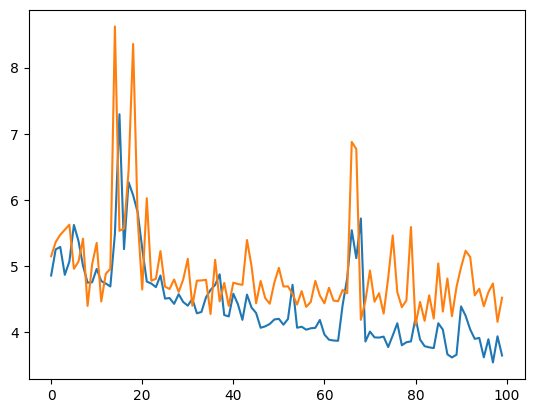

In [62]:
plt.plot(history.history['loss'][200:])
plt.plot(history.history['val_loss'][200:])

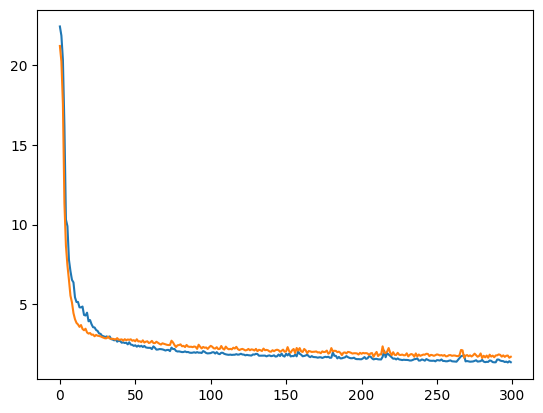

In [63]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [21]:
model.evaluate(test_x,test_y)  

4/4 [==============================] - 0s 2ms/step - loss: 615.8578 - mae: 23.0784


[615.8577880859375, 23.078432083129883]

In [22]:
predictions=model.predict(test_x)

4/4 [==============================] - 0s 2ms/step


In [23]:
for i in range(len(predictions)):
    print(predictions[i], test_y[i])

[0.] 7.2
[0.] 18.8
[0.] 19.0
[0.] 27.0
[0.] 22.2
[0.] 24.5
[0.] 31.2
[0.] 22.9
[0.] 20.5
[0.] 23.2
[0.] 18.6
[0.] 14.5
[0.] 17.8
[0.] 50.0
[0.] 20.8
[0.] 24.3
[0.] 24.2
[0.] 19.8
[0.] 19.1
[0.] 22.7
[0.] 12.0
[0.] 10.2
[0.] 20.0
[0.] 18.5
[0.] 20.9
[0.] 23.0
[0.] 27.5
[0.] 30.1
[0.] 9.5
[0.] 22.0
[0.] 21.2
[0.] 14.1
[0.] 33.1
[0.] 23.4
[0.] 20.1
[0.] 7.4
[0.] 15.4
[0.] 23.8
[0.] 20.1
[0.] 24.5
[0.] 33.0
[0.] 28.4
[0.] 14.1
[0.] 46.7
[0.] 32.5
[0.] 29.6
[0.] 28.4
[0.] 19.8
[0.] 20.2
[0.] 25.0
[0.] 35.4
[0.] 20.3
[0.] 9.7
[0.] 14.5
[0.] 34.9
[0.] 26.6
[0.] 7.2
[0.] 50.0
[0.] 32.4
[0.] 21.6
[0.] 29.8
[0.] 13.1
[0.] 27.5
[0.] 21.2
[0.] 23.1
[0.] 21.9
[0.] 13.0
[0.] 23.2
[0.] 8.1
[0.] 5.6
[0.] 21.7
[0.] 29.6
[0.] 19.6
[0.] 7.0
[0.] 26.4
[0.] 18.9
[0.] 20.9
[0.] 28.1
[0.] 35.4
[0.] 10.2
[0.] 24.3
[0.] 43.1
[0.] 17.6
[0.] 15.4
[0.] 16.2
[0.] 27.1
[0.] 21.4
[0.] 21.5
[0.] 22.4
[0.] 25.0
[0.] 16.6
[0.] 18.6
[0.] 22.0
[0.] 42.8
[0.] 35.1
[0.] 21.5
[0.] 36.0
[0.] 21.9
[0.] 24.1
[0.] 50.0
[0.] 26.